In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
import nltk

In [2]:
df = pd.read_csv('C:\\Users\\arghy\\Desktop\\NLP project\\Reviews.csv')

In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
df['Text'].values[0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [5]:
print(df.shape)

(568454, 10)


In [6]:
df = df.head(500)
print

<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [7]:
print(df.shape)

(500, 10)


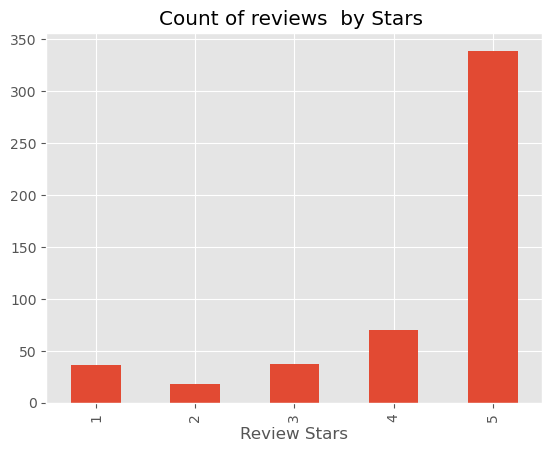

In [8]:
ax = df["Score"].value_counts().sort_index().plot(
    kind= 'bar',
    title = 'Count of reviews  by Stars ')
ax.set_xlabel('Review Stars')
plt.show()

## Basic NLTK

In [10]:
example = df['Text'][51]

In [11]:
print (example)

Got a free package of these with a bottle of bloody mary mix I bought from the seller, and the advertising worked..lol,  I tried them, and shared them with 2 buddies, and we all loved them...  So im here to buy more, and noticed there were no reviews yet,...  well now there is.  They are Hot,  but not "burn your mouth forever hot"  its a nice temp...  Perfect for us..


In [12]:
tokens = nltk.word_tokenize(example)

In [13]:
tokens[:10]

['Got', 'a', 'free', 'package', 'of', 'these', 'with', 'a', 'bottle', 'of']

In [14]:
tagged = nltk.pos_tag(tokens)

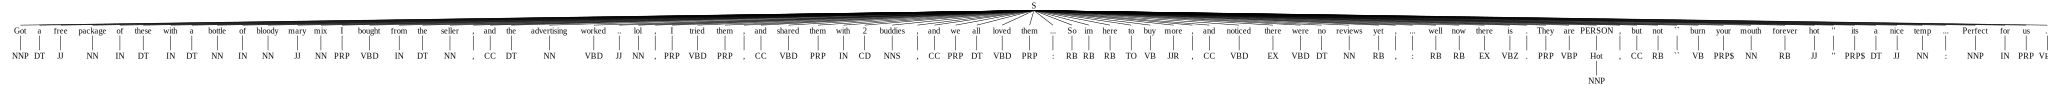

In [15]:
nltk.chunk.ne_chunk(tagged)

## VADER Sentiment Scoring

This uses a 'bag of words' approach 



1.Stop words removed


2.Each word is scored and combined to a total score

In [20]:
from nltk.sentiment import SentimentIntensityAnalyzer


In [21]:
sia = SentimentIntensityAnalyzer()

In [22]:
sia.polarity_scores(example)

{'neg': 0.047, 'neu': 0.735, 'pos': 0.218, 'compound': 0.9194}

In [23]:
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
495,496,B000G6RYNE,APGAA43E3WPN7,Darren,0,0,5,1201392000,amazing chips,i rarely eat chips but i saw these and tried t...
496,497,B000G6RYNE,ABR7HU5H1KNE,Keith,0,0,5,1196726400,Best Chip Ever,This is easily the best potato chip that I hav...
497,498,B000G6RYNE,AJQD2WWJYOYFQ,bubbles,0,0,4,1186617600,"Tangy, spicy, and sweet- oh my!",Kettle Chips Spicy Thai potato chips have the ...
498,499,B000G6RYNE,A16YH487W9ZYO0,Bruce G. Lindsay,0,0,4,1184198400,An indulgence with a bite,"Okay, I should not eat potato chips, nor shoul..."


In [24]:


        
def vader_sentiment(Text):
    scores = sia.polarity_scores(str(Text))  # Ensure text is a string
    return pd.Series({
        'vader_neg': scores['neg'], 
        'vader_neu': scores['neu'], 
        'vader_pos': scores['pos'], 
        'compound': scores['compound']
    })


In [25]:
## Apply the Function to the 'Text' Column

In [26]:
df[['vader_neg', 'vader_neu', 'vader_pos', 'compound']] = df['Text'].apply(vader_sentiment)


In [27]:
sns

<module 'seaborn' from 'C:\\Users\\arghy\\AppData\\Local\\anaconda3\\Lib\\site-packages\\seaborn\\__init__.py'>

In [28]:
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,vader_neg,vader_neu,vader_pos,compound
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.000,0.695,0.305,0.9441
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.138,0.862,0.000,-0.5664
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0.091,0.754,0.155,0.8265
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0.000,1.000,0.000,0.0000
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.000,0.552,0.448,0.9468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,B000G6RYNE,APGAA43E3WPN7,Darren,0,0,5,1201392000,amazing chips,i rarely eat chips but i saw these and tried t...,0.000,0.554,0.446,0.9725
496,497,B000G6RYNE,ABR7HU5H1KNE,Keith,0,0,5,1196726400,Best Chip Ever,This is easily the best potato chip that I hav...,0.059,0.799,0.142,0.7833
497,498,B000G6RYNE,AJQD2WWJYOYFQ,bubbles,0,0,4,1186617600,"Tangy, spicy, and sweet- oh my!",Kettle Chips Spicy Thai potato chips have the ...,0.025,0.762,0.212,0.9848
498,499,B000G6RYNE,A16YH487W9ZYO0,Bruce G. Lindsay,0,0,4,1184198400,An indulgence with a bite,"Okay, I should not eat potato chips, nor shoul...",0.041,0.904,0.055,0.1280


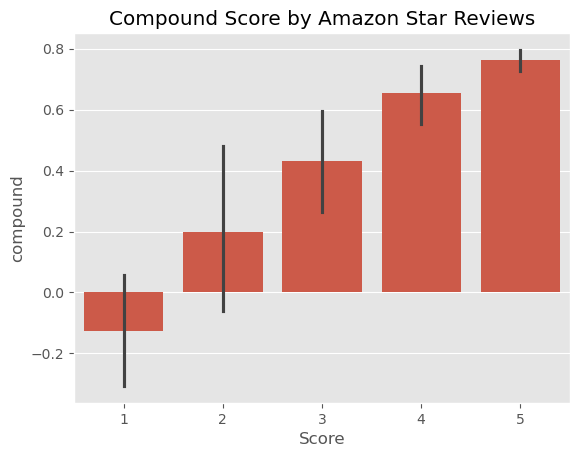

In [29]:
ax = sns.barplot(data = df , x = "Score" , y = "compound")
ax.set_title("Compound Score by Amazon Star Reviews")
plt.show()

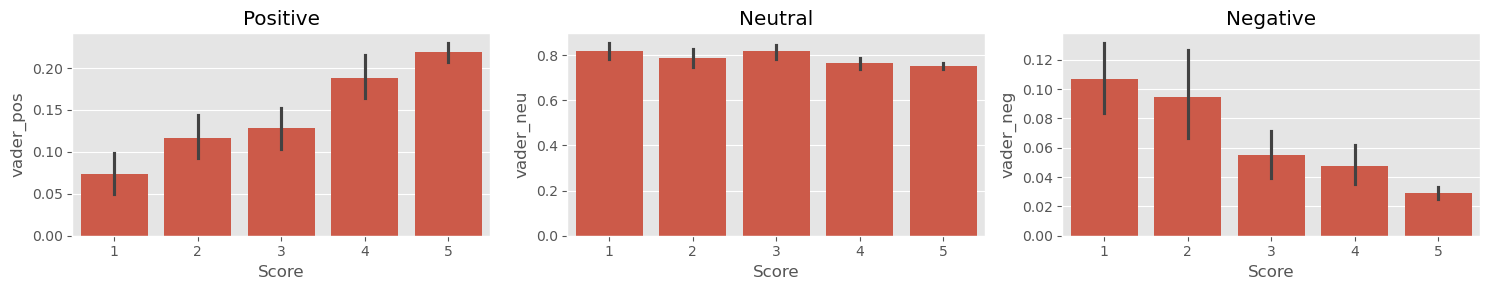

In [30]:
fig,axs = plt.subplots(1,3 , figsize =(15,3))
sns.barplot(data = df, x = 'Score' , y = 'vader_pos',ax = axs[0])

sns.barplot(data = df, x = 'Score' , y = 'vader_neu',ax = axs[1])
sns.barplot(data = df, x = 'Score' , y = 'vader_neg',ax = axs[2])

axs[0].set_title("Positive")
axs[1].set_title("Neutral")
axs[2].set_title("Negative")
plt.tight_layout()


## ROBERTA Pretrained Model

In [32]:
from  transformers import AutoTokenizer
from  transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [33]:
# Load model directly
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

## RUN ROBERTA ON ENTIRE DATA SET

In [35]:
def roberta_sentiment(text):
    # Tokenize and prepare the text input
    encoded_text = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)
    
    # Get the output from the model
    output = model(**encoded_text)
    
    # Extract scores and apply softmax
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    
    # Return the sentiment scores as a pandas Series (negative, neutral, positive)
    return pd.Series(scores, index=['roberta_neg', 'roberta_neu', 'roberta_pos'])
    

In [37]:
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,vader_neg,vader_neu,vader_pos,compound
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.000,0.695,0.305,0.9441
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.138,0.862,0.000,-0.5664
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0.091,0.754,0.155,0.8265
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0.000,1.000,0.000,0.0000
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.000,0.552,0.448,0.9468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,B000G6RYNE,APGAA43E3WPN7,Darren,0,0,5,1201392000,amazing chips,i rarely eat chips but i saw these and tried t...,0.000,0.554,0.446,0.9725
496,497,B000G6RYNE,ABR7HU5H1KNE,Keith,0,0,5,1196726400,Best Chip Ever,This is easily the best potato chip that I hav...,0.059,0.799,0.142,0.7833
497,498,B000G6RYNE,AJQD2WWJYOYFQ,bubbles,0,0,4,1186617600,"Tangy, spicy, and sweet- oh my!",Kettle Chips Spicy Thai potato chips have the ...,0.025,0.762,0.212,0.9848
498,499,B000G6RYNE,A16YH487W9ZYO0,Bruce G. Lindsay,0,0,4,1184198400,An indulgence with a bite,"Okay, I should not eat potato chips, nor shoul...",0.041,0.904,0.055,0.1280


In [39]:
import concurrent.futures

def apply_roberta_in_parallel(df, function):
    # Using ThreadPoolExecutor for parallel processing
    with concurrent.futures.ThreadPoolExecutor() as executor:
        results = list(executor.map(function, df['Text']))
        
    # Convert results into a DataFrame and join to original DataFrame
    sentiment_df = pd.DataFrame(results, columns=['roberta_neg', 'roberta_neu', 'roberta_pos'])
    return pd.concat([df, sentiment_df], axis=1)

# Apply the function in parallel
df = apply_roberta_in_parallel(df, roberta_sentiment)



In [41]:
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,vader_neg,vader_neu,vader_pos,compound,roberta_neg,roberta_neu,roberta_pos
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.138,0.862,0.000,-0.5664,0.508986,0.452414,0.038600
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,B000G6RYNE,APGAA43E3WPN7,Darren,0,0,5,1201392000,amazing chips,i rarely eat chips but i saw these and tried t...,0.000,0.554,0.446,0.9725,0.001906,0.009862,0.988232
496,497,B000G6RYNE,ABR7HU5H1KNE,Keith,0,0,5,1196726400,Best Chip Ever,This is easily the best potato chip that I hav...,0.059,0.799,0.142,0.7833,0.004415,0.034215,0.961369
497,498,B000G6RYNE,AJQD2WWJYOYFQ,bubbles,0,0,4,1186617600,"Tangy, spicy, and sweet- oh my!",Kettle Chips Spicy Thai potato chips have the ...,0.025,0.762,0.212,0.9848,0.006427,0.074537,0.919036
498,499,B000G6RYNE,A16YH487W9ZYO0,Bruce G. Lindsay,0,0,4,1184198400,An indulgence with a bite,"Okay, I should not eat potato chips, nor shoul...",0.041,0.904,0.055,0.1280,0.865614,0.119366,0.015020


In [43]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'vader_neg', 'vader_neu', 'vader_pos', 'compound', 'roberta_neg',
       'roberta_neu', 'roberta_pos'],
      dtype='object')

In [45]:
df = df.rename(columns={
    'compound' : 'vader_compound'
})


In [47]:
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.138,0.862,0.000,-0.5664,0.508986,0.452414,0.038600
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,B000G6RYNE,APGAA43E3WPN7,Darren,0,0,5,1201392000,amazing chips,i rarely eat chips but i saw these and tried t...,0.000,0.554,0.446,0.9725,0.001906,0.009862,0.988232
496,497,B000G6RYNE,ABR7HU5H1KNE,Keith,0,0,5,1196726400,Best Chip Ever,This is easily the best potato chip that I hav...,0.059,0.799,0.142,0.7833,0.004415,0.034215,0.961369
497,498,B000G6RYNE,AJQD2WWJYOYFQ,bubbles,0,0,4,1186617600,"Tangy, spicy, and sweet- oh my!",Kettle Chips Spicy Thai potato chips have the ...,0.025,0.762,0.212,0.9848,0.006427,0.074537,0.919036
498,499,B000G6RYNE,A16YH487W9ZYO0,Bruce G. Lindsay,0,0,4,1184198400,An indulgence with a bite,"Okay, I should not eat potato chips, nor shoul...",0.041,0.904,0.055,0.1280,0.865614,0.119366,0.015020


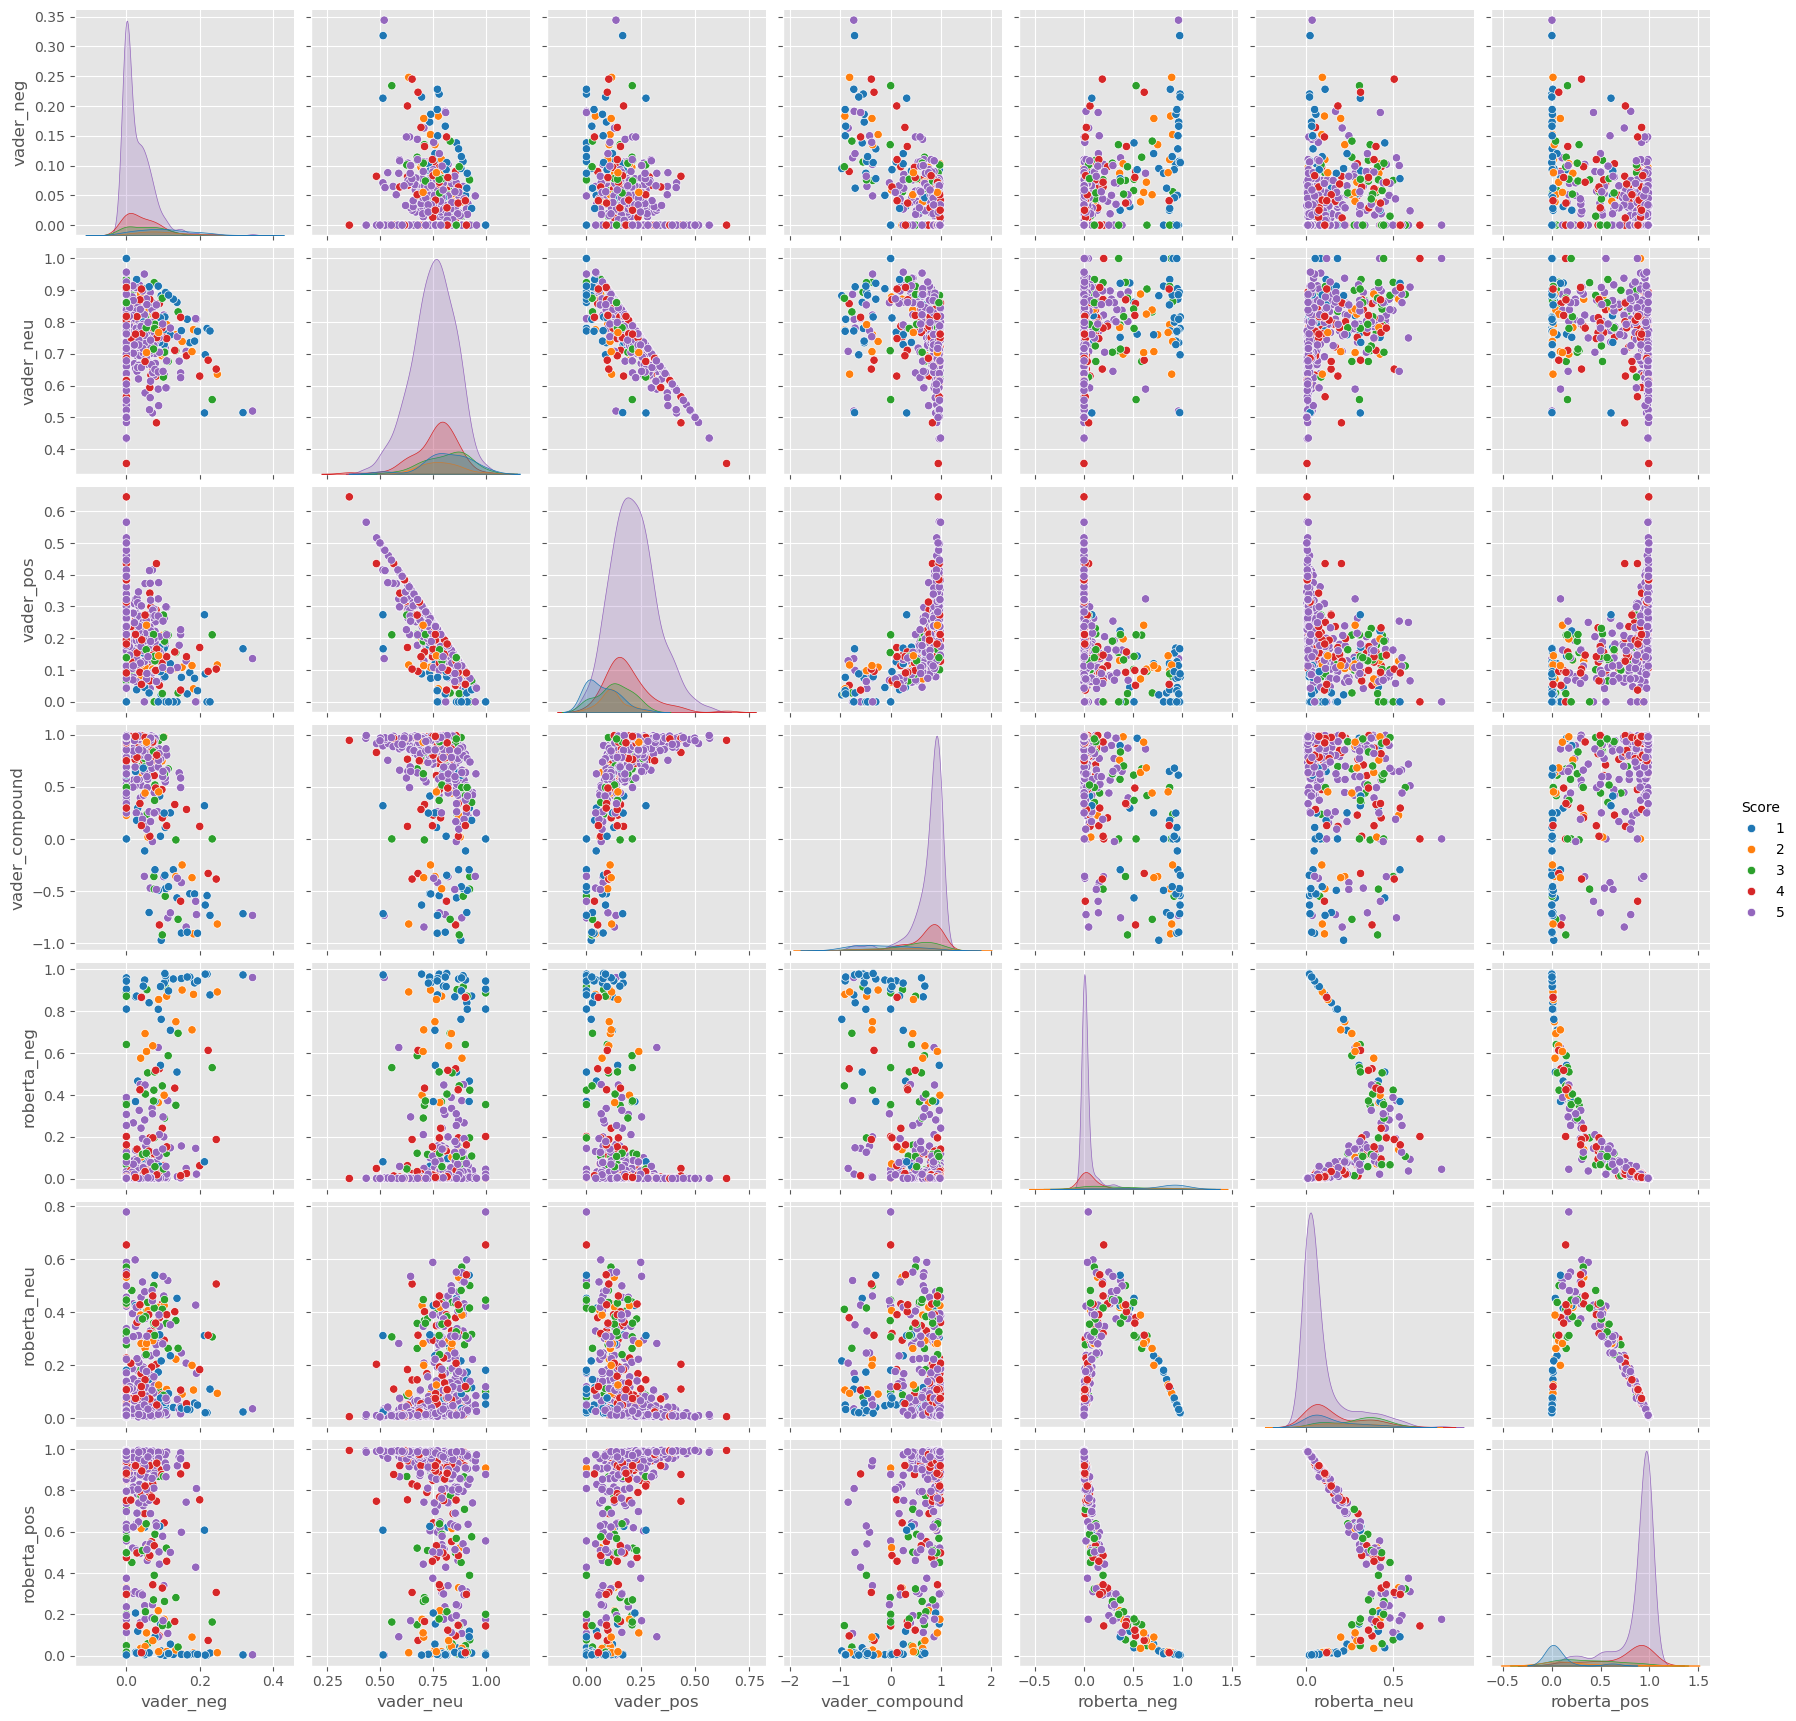

<Figure size 640x480 with 0 Axes>

In [51]:
sns.pairplot(data = df,
            vars = ['vader_neg','vader_neu','vader_pos','vader_compound',
                  'roberta_neg','roberta_neu','roberta_pos'],
            hue = "Score",
            palette = 'tab10')
plt.show()
plt.tight_layout()